# Netflix Data Visualization

### Introduction
Netflix is probably the most famous VOD streaming service next to HBO Max and Amazon Prime. The following data visualization is based on the data set downloaded from https://www.kaggle.com/. The purpose of this notebook is to make simple plots to find out interesting facts about Netflix.

### List of The Features:
* show_id - unique ID of a title,
* type - type of a title (either Movie or TV Show),
* director - director of a title,
* country - country or countries where a title was produced,
* date_added - a date when a title was added to Netflix library,
* release_year - a date when a movie was released internationally,
* rating - maturity rating of a movie,
* duration - duration of a movie (minutes for Movies or number of seasons for TV Shows),
* listed_in - genre of a title,
* description - plot description of a title.

### Libraries
Importing essential libraries: numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Setting global dimensions of canvas for matplotlib.

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]

### Preview of The Data
Checking the consistency of the dataset.

In [3]:
netflix_df = pd.read_csv('data/Netflix_Titles.csv')

In [4]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There is some substential missing data in the 'director', 'cast' and 'country' features. Perhaps creators forgot to include themselves and their cast in the end credits :). The 'date_added' and 'rating' lack just few positions.

### Number of Movies or TV Shows?
Let's see what is the number of movies and TV shows on Netflix.

<AxesSubplot:xlabel='type', ylabel='count'>

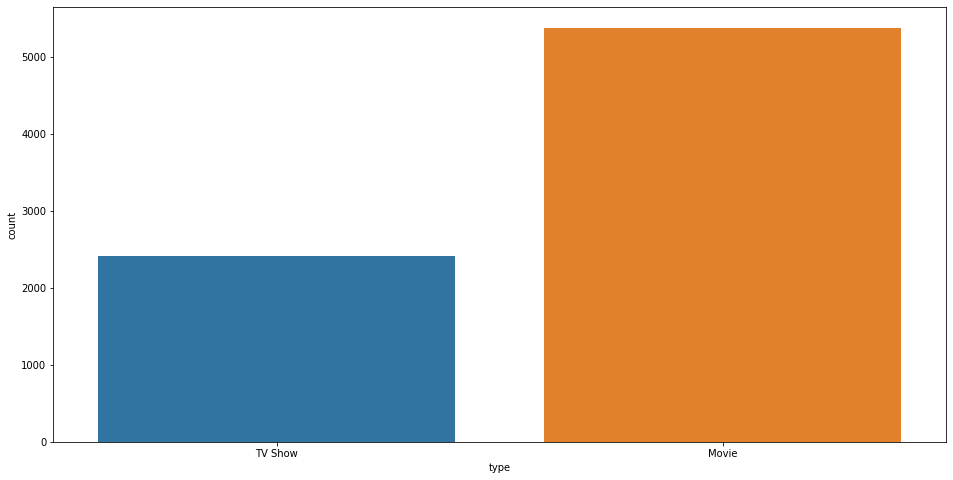

In [8]:
sns.countplot(x = 'type', data = netflix_df)

To know the accurate constitution:

In [9]:
x = netflix_df['type'].value_counts()
movies = (np.round(x[0]/(x[0]+x[1])*100,2))
tvshows = (np.round(x[1]/(x[0]+x[1])*100,2))
print(f'Movies constitute to {movies}% and TV shows to {tvshows}% to the total number of titles on Netflix.')

Movies constitute to 69.05% and TV shows to 30.95% to the total number of titles on Netflix.


We can encounter more movies to TV shows on Netflix. However, TV shows are much longer than movies.

### Which year was the most abundant in new movies and TV shows?
Let's see first, which year favoured in the highest number of productions available on Netflix. Let's analyze the new productions from the last 30 years.

<AxesSubplot:xlabel='release_year', ylabel='count'>

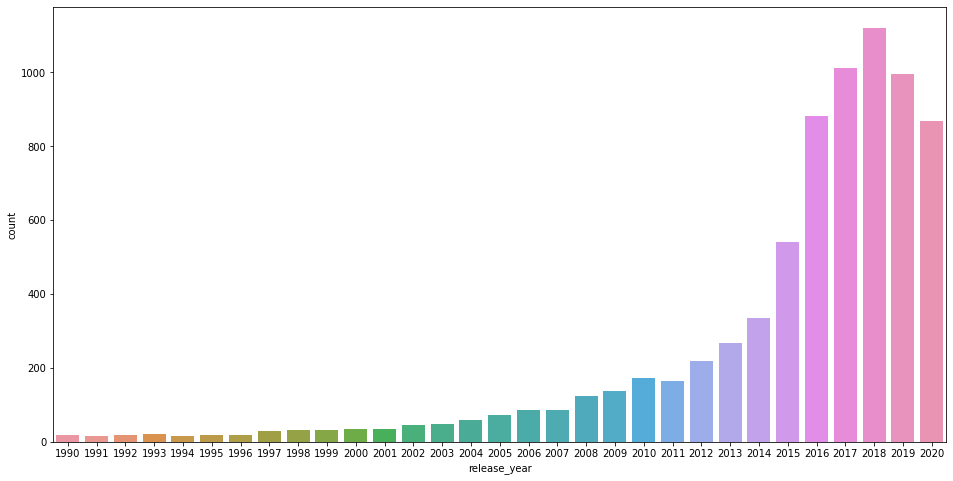

In [10]:
years_ordered=range(1990, 2021, 1)
sns.countplot(x = 'release_year', data = netflix_df, order=years_ordered)

The most popular year of production of available titles on Netflix belongs to the year 2018. Let's check now which year was the most generous for Netflix users.

In [11]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

As checked before, the 'date_added' features lacks only 10 positions. Let's skip them.

In [12]:
year_added_list = []
for year in netflix_df['date_added'].dropna():
    year_added_list.append(int(year[-4::]))

In [13]:
year_added_list[0:10]

[2020, 2016, 2018, 2017, 2020, 2017, 2020, 2019, 2019, 2017]

In [14]:
year_added_df = pd.DataFrame(year_added_list, columns=['year_added'])

In [15]:
year_added_df

,year_added
0,2020
1,2016
2,2018
3,2017
4,2020
...,...
7772,2020
7773,2019
7774,2020
7775,2020


Let's check when the first title was update on Netflix.

In [16]:
year_added_df['year_added'].min()

2008

<AxesSubplot:xlabel='year_added', ylabel='count'>

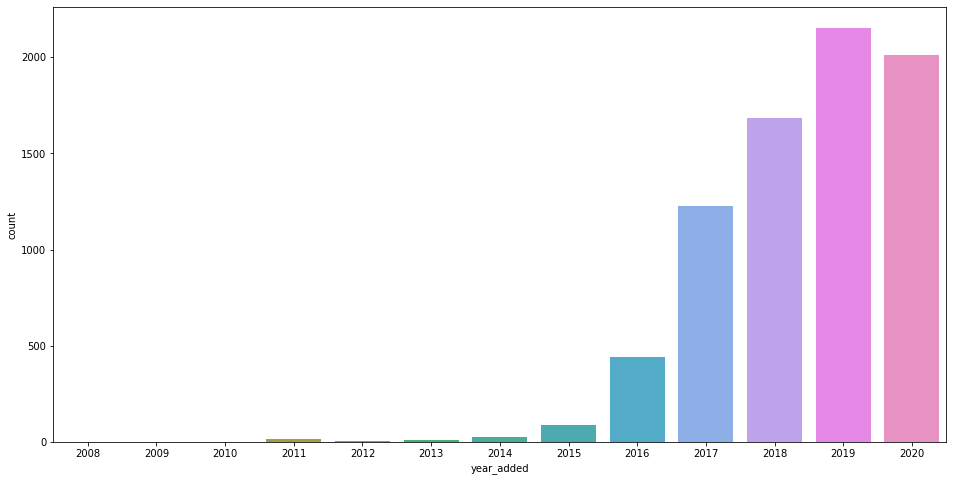

In [17]:
years_ordered=range(2008, 2021, 1)

sns.countplot(x ='year_added', data = year_added_df, order=years_ordered)

In the year 2019, the highest number of titles was uploaded on Netflix. It seems that Netflix started being popular around 2016-2017.

### Which countries produce the most for Netflix?
Let's see which countries are the most popular producents for the Netflix platform.

<AxesSubplot:xlabel='country', ylabel='count'>

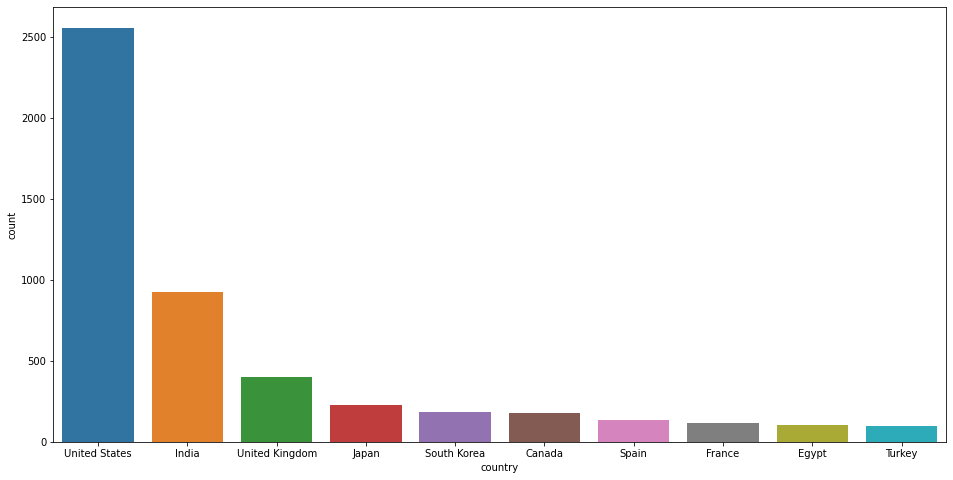

In [18]:
sns.countplot(x = 'country', data = netflix_df, order=netflix_df['country'].value_counts().index[0:10])

The winner is the United States followed by India. Hollywood and Bollywood oblige.

### Most popular directors?
Let's check if the names ring a bell.

In [19]:
netflix_df['director'].dropna()

1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
5             Serdar Akar
              ...        
7780         Shlok Sharma
7781         Peter Hewitt
7782          Josef Fares
7783          Mozez Singh
7786             Sam Dunn
Name: director, Length: 5398, dtype: object

<AxesSubplot:xlabel='director', ylabel='count'>

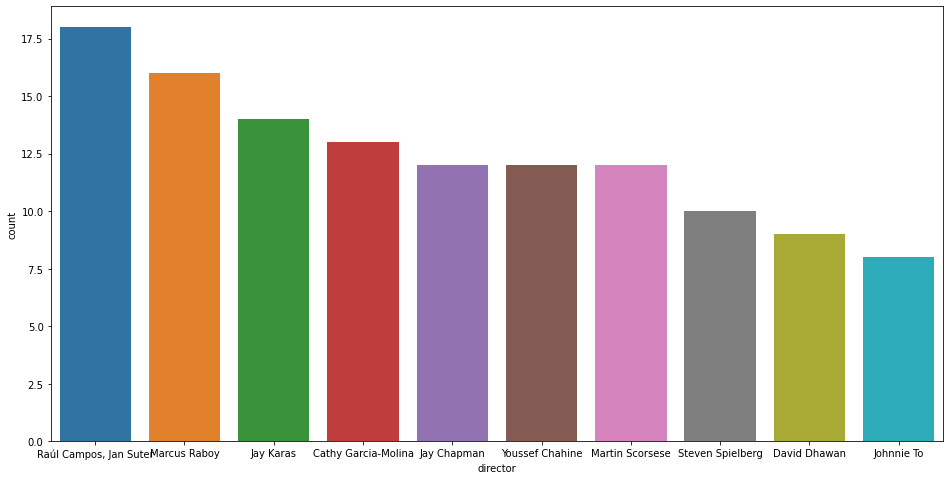

In [20]:
order=netflix_df['director'].value_counts().index[0:10]
sns.countplot(x='director', data=netflix_df, order=order)

The most productive director is Raúl Campos, Jan Suter with 18 titles.

### Most popular actor/actress?

In [21]:
cast_series = netflix_df['cast'].dropna()
cast_list = [cast.split(',') for cast in cast_series]
cast_flattened = [person for sublist in cast_list for person in sublist]
cast_df = pd.DataFrame(cast_flattened, columns=['Actor/Actress'])

In [22]:
cast_df

,Actor/Actress
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
55950,Anita Shabdish
55951,Chittaranjan Tripathy
55952,Nasty C
55953,Adriano Zumbo


<AxesSubplot:xlabel='Actor/Actress', ylabel='count'>

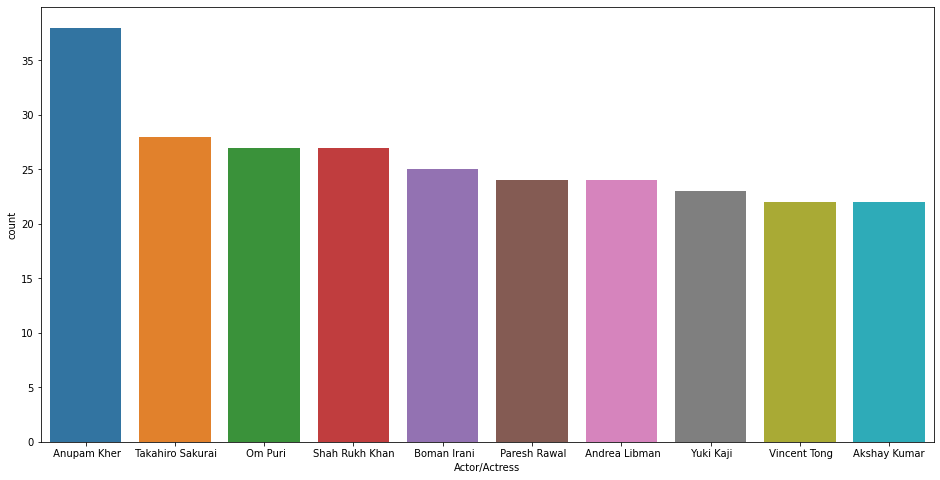

In [23]:
order=cast_df['Actor/Actress'].value_counts().index[0:10]
sns.countplot(x='Actor/Actress', data=cast_df, order=order)

The most popular actor is an Indian actor named Anupam Kher.
<img width=25% src="materials/Anupam-Kher.jpg"/>

### Most popular ratings?
Let's check the TV parental guidelines.

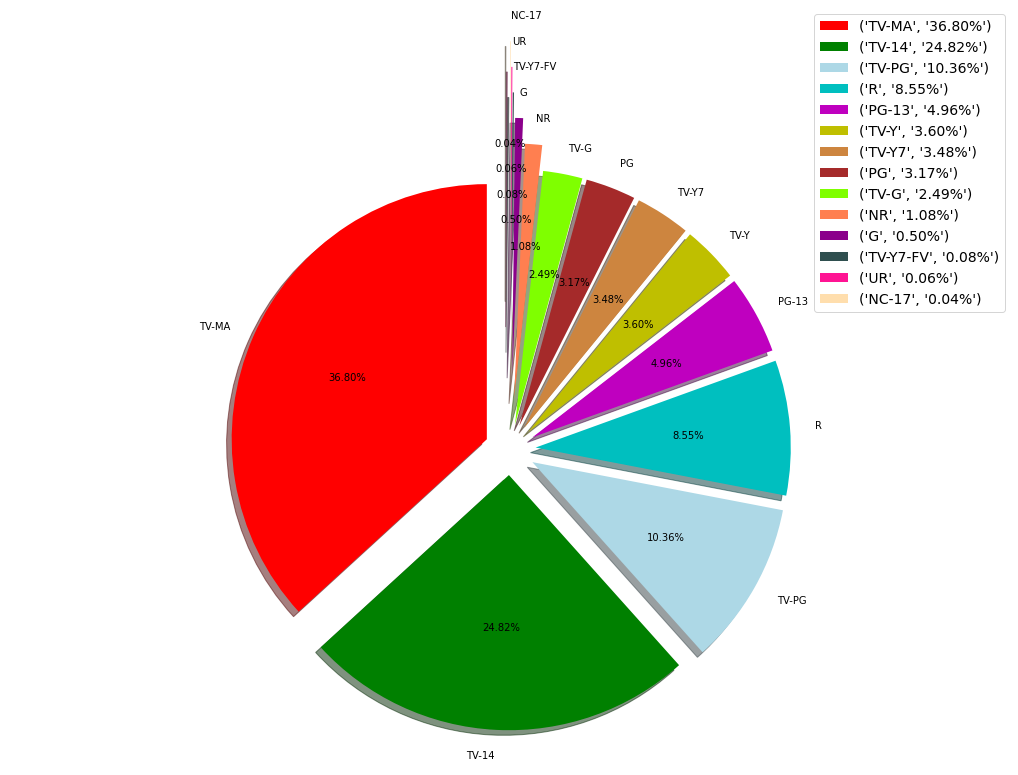

In [24]:
plt.figure(figsize=(18,14)) 

data = list(netflix_df['rating'].value_counts())
labels = list(netflix_df['rating'].value_counts().index)
colors = ['r', 'g', 'lightblue', 'c', 'm', 'y', 'peru', 'Brown', 'Chartreuse', 'Coral', 'DarkMagenta', 'DarkSlateGrey', 'DeepPink', 'NavajoWhite']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6) 

patches, texts, autotexts = plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)

percentages = []
for autotext in autotexts:
    percentage = str(autotext).split(',')[2].split("'")[1]
    percentages.append(percentage)

zipped_legend = zip(labels, percentages)

plt.legend(patches, zipped_legend, loc="best", fontsize=14)

plt.axis('equal')
plt.show()

The dominant content is devoted to adults (TV-MA), followed by titles recommended above 14 years old (TV-14).

### Movies and TV Shows
Let's analyze movies and tv shows indepedently.

In [25]:
movies_df = netflix_df[netflix_df['type']=='Movie']
tvshows_df = netflix_df[netflix_df['type']=='TV Show']

In [26]:
movies_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


In [27]:
tvshows_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."


### Duration of movies and TV shows?
Let's see what is the most popular time duration of movies.

In [28]:
movies_df['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [29]:
movies_duration = []
for movie in movies_df['duration']:
    movies_duration.append(int(movie.replace("min", "")))

In [30]:
movies_duration[0:10]

[93, 78, 80, 123, 95, 119, 118, 143, 103, 89]

In [31]:
np.round(np.average(movies_duration),2)

99.31

<AxesSubplot:ylabel='Density'>

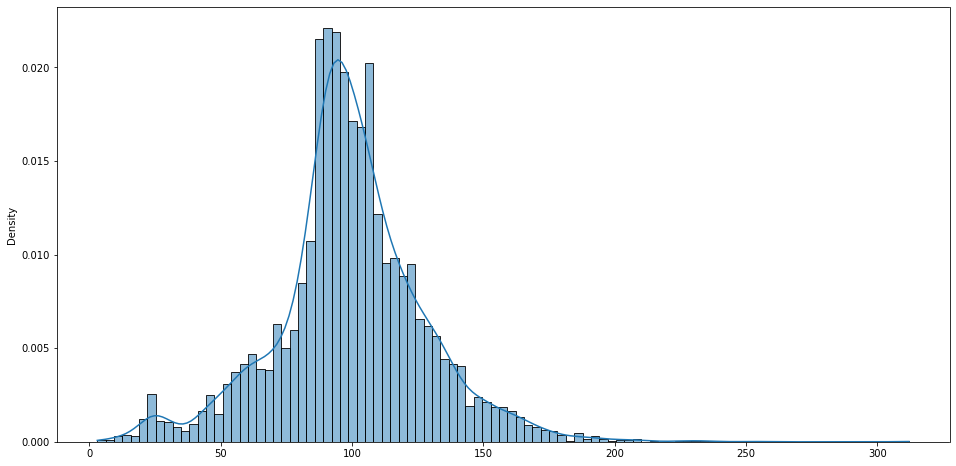

In [32]:
sns.histplot(movies_duration, kde=True, stat='density')

The most popular runtime for movies is between 90-100mins. The average length of a movie is 99 min.

Now let's check how many seasons should be expected from TV shows on Netflix.

In [33]:
tvshows_duration = []
for tvshow in tvshows_df['duration']:
    if 'Seasons' in tvshow:
        tvshows_duration.append(int(tvshow.replace("Seasons", "")))
    else:
        tvshows_duration.append(int(tvshow.replace("Season", "")))

In [34]:
tvshows_duration[0:10]

[4, 1, 1, 1, 1, 2, 1, 1, 1, 1]

In [35]:
np.round(np.average(tvshows_duration),2)

1.78

<AxesSubplot:ylabel='Density'>

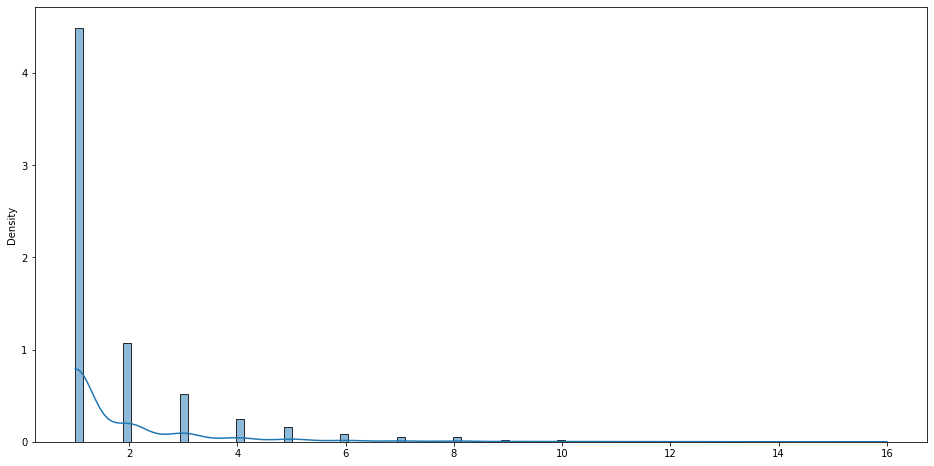

In [36]:
sns.histplot(tvshows_duration, kde=True, stat='density')

Probably this is sad information, but Netflix users should not fall in love to TV shows as one season is likely to be their last one. The average length of a TV show is around 1.8 seasons.

### The most dominant genres?
Let's see which type of genre is most popular for movies and TV shows, respectively.

In [37]:
movies_genres_series = movies_df['listed_in'].dropna()
movies_genres_list = [genres.split(',') for genres in movies_genres_series]
movies_genres_flattened = [type for sublist in movies_genres_list for type in sublist]
movies_genres_df = pd.DataFrame(movies_genres_flattened, columns=['Genre'])

In [38]:
movies_genres_df

,Genre
0,Dramas
1,International Movies
2,Horror Movies
3,International Movies
4,Action & Adventure
...,...
11541,Documentaries
11542,International Movies
11543,Music & Musicals
11544,Documentaries


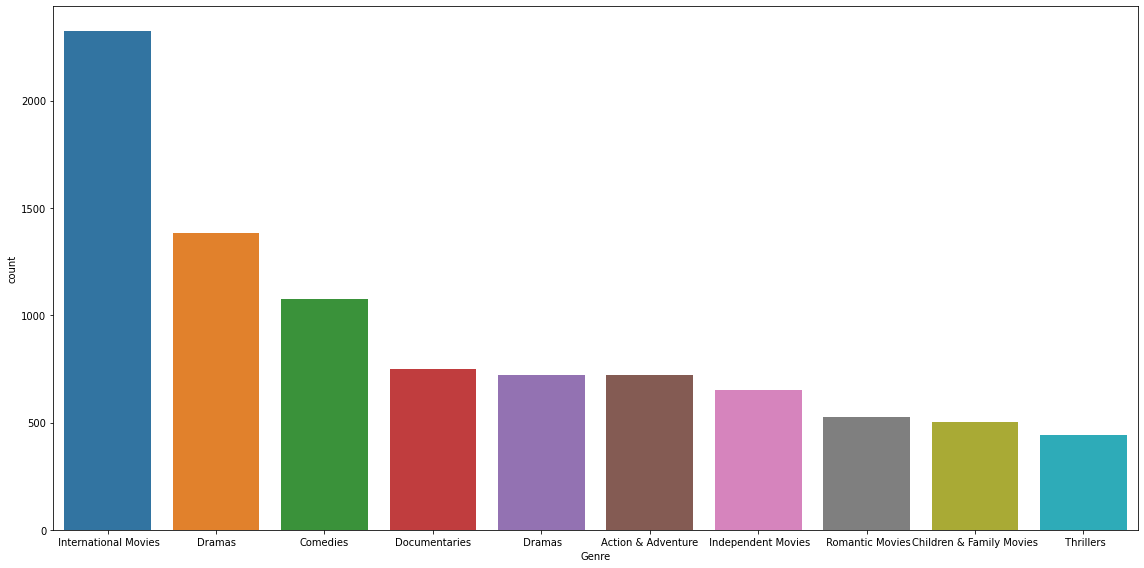

In [39]:
order=movies_genres_df['Genre'].value_counts().index[0:10]
sns.countplot(x='Genre', data=movies_genres_df, order=order)
plt.tight_layout()

The most popular genre is "International Movies". However, I would not classify it as a genre. Let's say that "Dramas" and "Comedies" are what people like the most. Let's do the same for TV shows.

In [40]:
tvshows_genres_series = tvshows_df['listed_in'].dropna()
tvshows_genres_list = [genres.split(',') for genres in tvshows_genres_series]
tvshows_genres_flattened = [type for sublist in tvshows_genres_list for type in sublist]
tvshows_genres_df = pd.DataFrame(tvshows_genres_flattened, columns=['Genre'])

In [41]:
tvshows_genres_df

,Genre
0,International TV Shows
1,TV Dramas
2,TV Sci-Fi & Fantasy
3,International TV Shows
4,TV Dramas
...,...
5520,International TV Shows
5521,Spanish-Language TV Shows
5522,Stand-Up Comedy & Talk Shows
5523,International TV Shows


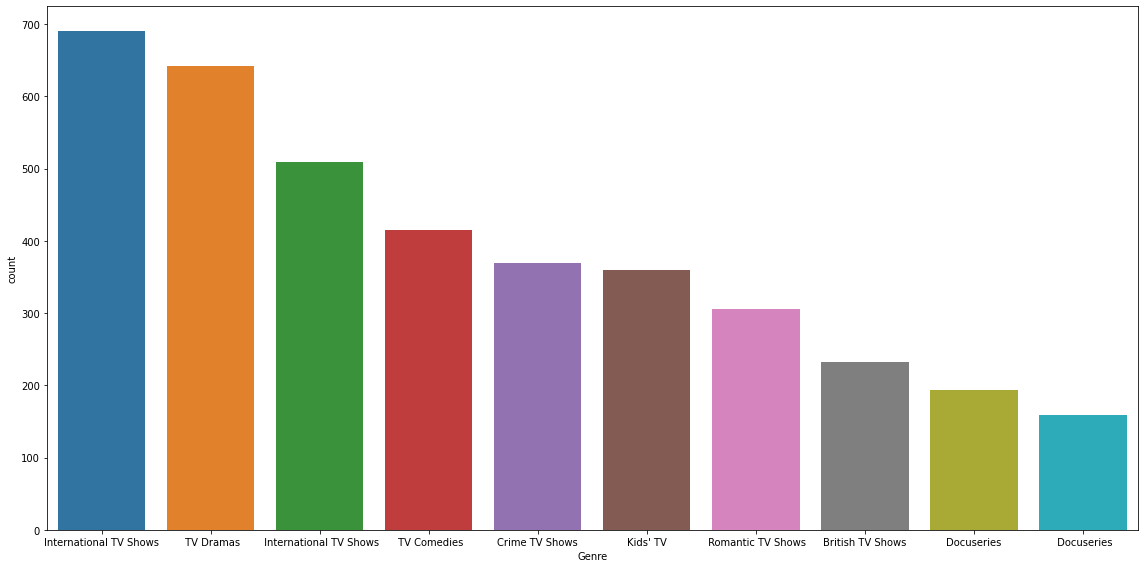

In [42]:
order=tvshows_genres_df['Genre'].value_counts().index[0:10]
sns.countplot(x='Genre', data=tvshows_genres_df, order=order)
plt.tight_layout()

The situation is the same as before, "TV Dramas" is followed by "TV Comedies".